In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df1 =  pd.read_csv('application_data.csv.zip')
df2 =  pd.read_csv('previous_application.csv.zip')

In [100]:
df3 = df1.merge(df2,on='SK_ID_CURR')

In [4]:
df3['NAME_GOODS_CATEGORY'].value_counts()

XNA                         797209
Mobile                      193743
Consumer Electronics        104785
Computers                    89923
Audio/Video                  85502
Furniture                    45439
Photo / Cinema Equipment     21707
Construction Materials       21356
Clothing and Accessories     19590
Auto Accessories              6228
Jewelry                       5188
Homewares                     4309
Medical Supplies              3240
Vehicles                      2854
Sport and Leisure             2540
Other                         2337
Gardening                     2322
Office Appliances             1985
Tourism                       1324
Medicine                      1302
Direct Sales                   330
Fitness                        166
Additional Service             109
Education                       89
Weapon                          65
Insurance                       58
Animals                          1
Name: NAME_GOODS_CATEGORY, dtype: int64

In [5]:
df3['DAYS_FIRST_DRAWING']

0          365243.0
1          365243.0
2          365243.0
3          365243.0
4          365243.0
             ...   
1413696    365243.0
1413697         NaN
1413698         NaN
1413699    365243.0
1413700    365243.0
Name: DAYS_FIRST_DRAWING, Length: 1413701, dtype: float64

In [8]:
df3['NAME_PORTFOLIO'].value_counts()

POS      592460
Cash     391663
XNA      307213
Cards    121985
Cars        380
Name: NAME_PORTFOLIO, dtype: int64

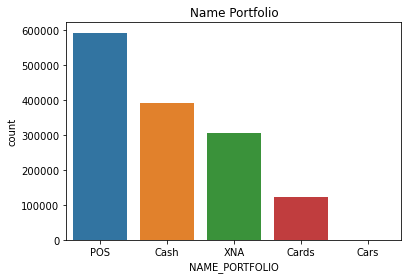

In [9]:
sns.countplot(df3['NAME_PORTFOLIO'])
plt.title('Name Portfolio')
plt.show()

In [10]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,1413701.0,278481.287512,102811.788043,100002.0,189364.0,278992.0,367556.0,456255.0
TARGET,1413701.0,0.086553,0.281179,0.0,0.0,0.0,0.0,1.0
CNT_CHILDREN,1413701.0,0.404893,0.717345,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,1413701.0,173316.043724,198573.372016,25650.0,112500.0,157500.0,207000.0,117000000.0
AMT_CREDIT_x,1413701.0,587553.672718,384917.331385,45000.0,270000.0,508495.5,807984.0,4050000.0
...,...,...,...,...,...,...,...,...
DAYS_FIRST_DUE,852595.0,13488.741567,71650.147146,-2892.0,-1630.0,-825.0,-408.0,365243.0
DAYS_LAST_DUE_1ST_VERSION,852595.0,33274.831806,106161.775933,-2801.0,-1244.0,-358.0,135.0,365243.0
DAYS_LAST_DUE,852595.0,76665.634755,149704.716371,-2889.0,-1316.0,-534.0,-73.0,365243.0
DAYS_TERMINATION,852595.0,82353.171672,153537.064274,-2874.0,-1269.0,-494.0,-42.0,365243.0


In [11]:
df3.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE_x              0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
DAYS_FIRST_DUE               561106
DAYS_LAST_DUE_1ST_VERSION    561106
DAYS_LAST_DUE                561106
DAYS_TERMINATION             561106
NFLAG_INSURED_ON_APPROVAL    561106
Length: 158, dtype: int64

In [12]:
#pd.crosstab(df3.TARGET,df3.CNT_PAYMENT,normalize='index',margins=True)

In [13]:
#df3.tail(30)

In [14]:
numerical_features = [col for col in df3.columns \
                      if np.issubdtype(df3[col].dtype, np.number)]
print(numerical_features)

['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START_x', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE

In [15]:
df3[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,1413701.0,278481.287512,102811.788043,100002.0,189364.0,278992.0,367556.0,456255.0
TARGET,1413701.0,0.086553,0.281179,0.0,0.0,0.0,0.0,1.0
CNT_CHILDREN,1413701.0,0.404893,0.717345,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,1413701.0,173316.043724,198573.372016,25650.0,112500.0,157500.0,207000.0,117000000.0
AMT_CREDIT_x,1413701.0,587553.672718,384917.331385,45000.0,270000.0,508495.5,807984.0,4050000.0
...,...,...,...,...,...,...,...,...
DAYS_FIRST_DUE,852595.0,13488.741567,71650.147146,-2892.0,-1630.0,-825.0,-408.0,365243.0
DAYS_LAST_DUE_1ST_VERSION,852595.0,33274.831806,106161.775933,-2801.0,-1244.0,-358.0,135.0,365243.0
DAYS_LAST_DUE,852595.0,76665.634755,149704.716371,-2889.0,-1316.0,-534.0,-73.0,365243.0
DAYS_TERMINATION,852595.0,82353.171672,153537.064274,-2874.0,-1269.0,-494.0,-42.0,365243.0


ValueError: num must be 1 <= num <= 10, not 11

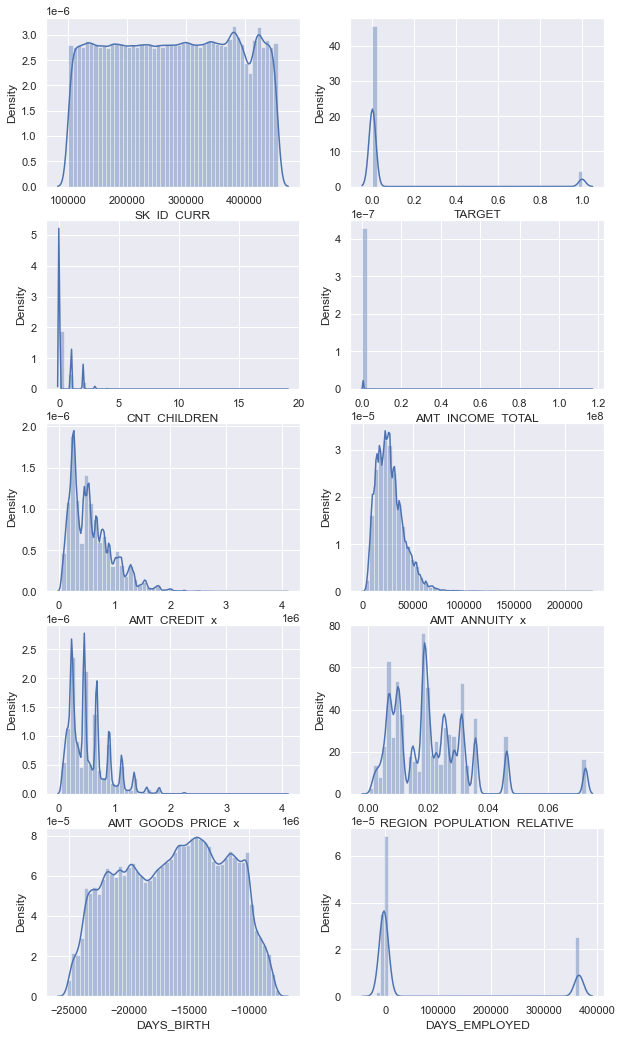

In [217]:
plt.figure(figsize=(10,18))
for index, col in enumerate(numerical_features):
    plt.subplot(5, 2, index+1)
    sns.distplot(df3[col])

<AxesSubplot:xlabel='NAME_PRODUCT_TYPE', ylabel='count'>

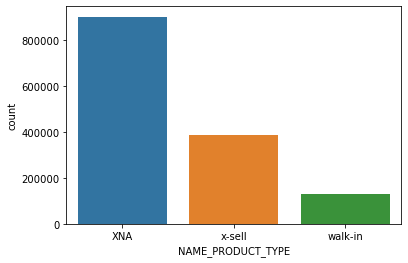

In [17]:
sns.countplot(x='NAME_PRODUCT_TYPE',data=df3)

In [18]:
df3['NAME_PRODUCT_TYPE'].value_counts()

XNA        900053
x-sell     385394
walk-in    128254
Name: NAME_PRODUCT_TYPE, dtype: int64

<AxesSubplot:xlabel='NAME_YIELD_GROUP', ylabel='count'>

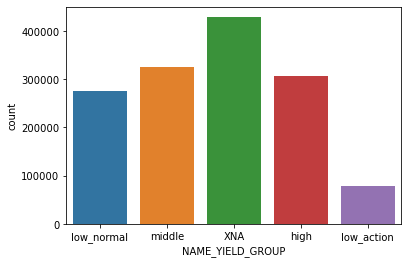

In [19]:
sns.countplot(x='NAME_YIELD_GROUP',data=df3)


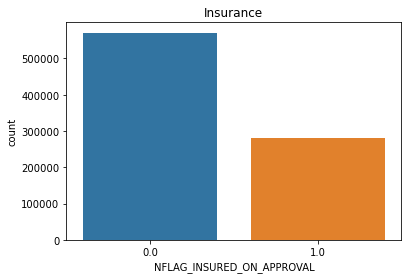

In [20]:
sns.countplot(x='NFLAG_INSURED_ON_APPROVAL',data=df3)
plt.title('Insurance')
plt.show()

In [21]:
#plt.scatter('DAYS_FIRST_DUE',range(30,50))

In [22]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

In [23]:
df3['DAYS_TERMINATION'].unique()

array([  -17.,  -527.,  -639., ..., -2765., -2744., -2848.])

In [24]:
#sns.set(rc={'figure.figsize':(15,10)})
#edu = sns.countplot(x='CODE_GENDER', hue='TARGET', data=df3)
#edu.set_xticklabels(['Male','Female'])
#plt.show()

In [25]:
pd.crosstab(df3.CODE_GENDER,df3.TARGET,normalize='index',margins=True)

TARGET,0,1
CODE_GENDER,,
F,0.923743,0.076257
M,0.891989,0.108011
XNA,1.000000,0.000000
All,0.913447,0.086553


In [26]:
df3['CODE_GENDER'].value_counts()

F      955139
M      458507
XNA        55
Name: CODE_GENDER, dtype: int64

<AxesSubplot:ylabel='CNT_PAYMENT'>

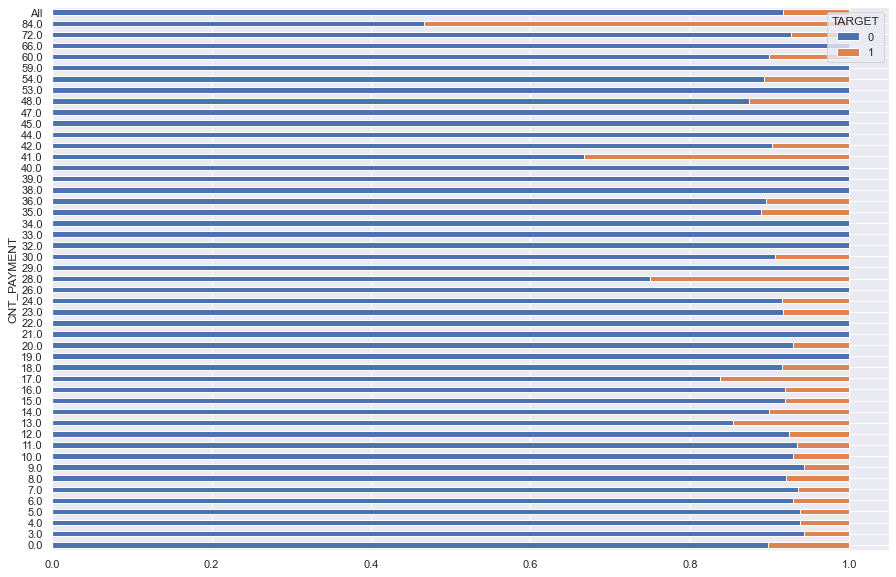

In [30]:
pd.crosstab(df3.CNT_PAYMENT,df3.TARGET,normalize='index',margins=True).plot(kind='barh', stacked=True)

In [232]:
df3['CNT_PAYMENT'].value_counts()

12.0    275258
6.0     162760
10.0    122546
0.0     121985
24.0    116777
18.0     65532
36.0     60844
60.0     45697
48.0     40709
8.0      26117
4.0      23360
30.0     14599
14.0      7188
42.0      6229
16.0      4782
5.0       3490
54.0      1853
20.0      1613
7.0       1282
9.0       1118
3.0        944
15.0       837
11.0       582
72.0       123
13.0        48
84.0        45
17.0        37
22.0        32
23.0        24
26.0        11
66.0        10
35.0         9
28.0         8
29.0         6
19.0         5
32.0         5
34.0         3
59.0         3
21.0         3
41.0         3
39.0         2
45.0         2
47.0         2
44.0         1
53.0         1
40.0         1
38.0         1
33.0         1
Name: CNT_PAYMENT, dtype: int64

***Default rate is highest for the Term of previous credit at application of the previous application is 84***

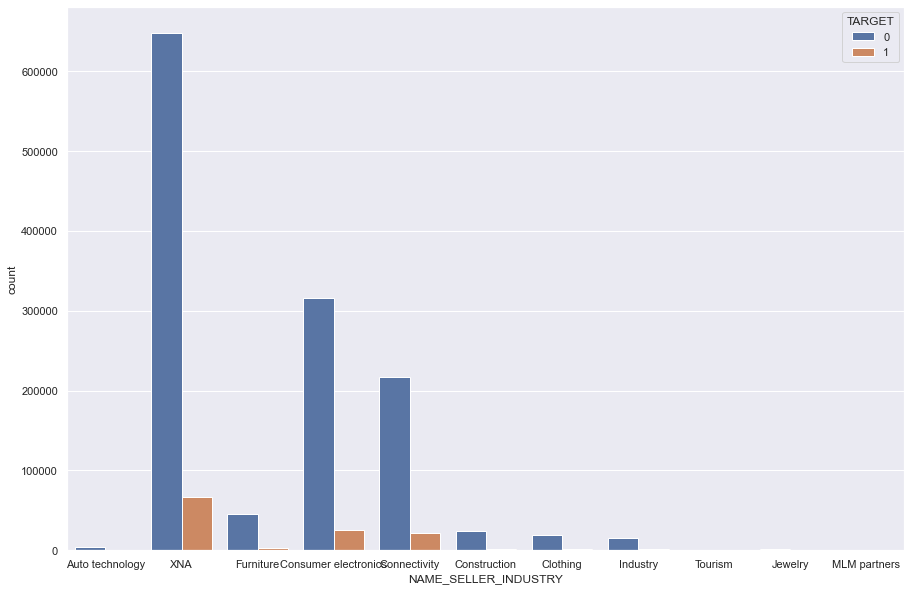

In [163]:
sns.set(rc={'figure.figsize':(15,10)})
edu = sns.countplot(x='NAME_SELLER_INDUSTRY', hue='TARGET', data=df3)
plt.show()

In [138]:
df3['age']=df3['DAYS_BIRTH']//365

In [139]:
df3['age'].value_counts()

-40    41107
-39    40641
-41    40053
-38    39731
-44    39208
-42    39063
-43    38572
-37    38407
-32    37750
-45    37012
-28    36525
-31    35523
-33    35479
-55    35383
-29    34907
-36    34573
-47    34481
-30    34442
-46    34420
-34    34391
-35    33602
-49    33085
-54    33068
-48    33045
-60    32941
-57    32514
-58    32499
-61    31146
-53    31026
-56    30948
-52    30576
-50    30471
-59    30326
-51    29171
-63    28004
-65    27659
-64    26997
-62    26881
-27    18277
-66    16579
-26    16320
-25    14567
-24    13050
-67    11058
-68    11038
-23     8976
-69     4921
-22     3221
-70       63
-21        4
Name: age, dtype: int64

<AxesSubplot:ylabel='age'>

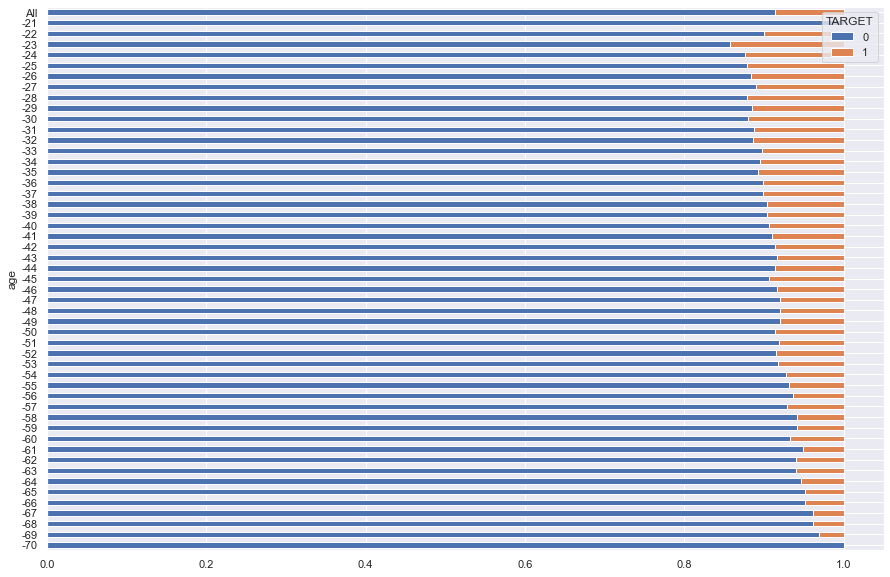

In [140]:
pd.crosstab(df3.age,df3.TARGET,normalize='index',margins=True).plot(kind='barh', stacked=True)

***The default rate decresases with the age of the client.It is highest for the clients aged 23 which is 14 percent***

In [141]:
pd.crosstab(df3.age,df3.TARGET,normalize='index',margins=True)

TARGET,0,1
age,,
-70,1.000000,0.000000
-69,0.968502,0.031498
-68,0.960772,0.039228
-67,0.960843,0.039157
-66,0.951626,0.048374
-65,0.951878,0.048122
-64,0.946068,0.053932
-63,0.940437,0.059563
-62,0.939809,0.060191


In [142]:
df3['NAME_CASH_LOAN_PURPOSE'].unique()

array(['XAP', 'XNA', 'Other', 'Payments on other loans',
       'Buying a used car', 'Repairs', 'Education', 'Buying a new car',
       'Everyday expenses', 'Medicine', 'Car repairs', 'Urgent needs',
       'Buying a holiday home / land', 'Building a house or an annex',
       'Furniture', 'Journey', 'Purchase of electronic equipment',
       'Wedding / gift / holiday', 'Buying a home',
       'Business development', 'Gasification / water supply',
       'Buying a garage', 'Hobby', 'Money for a third person',
       'Refusal to name the goal'], dtype=object)

<AxesSubplot:ylabel='NAME_CASH_LOAN_PURPOSE'>

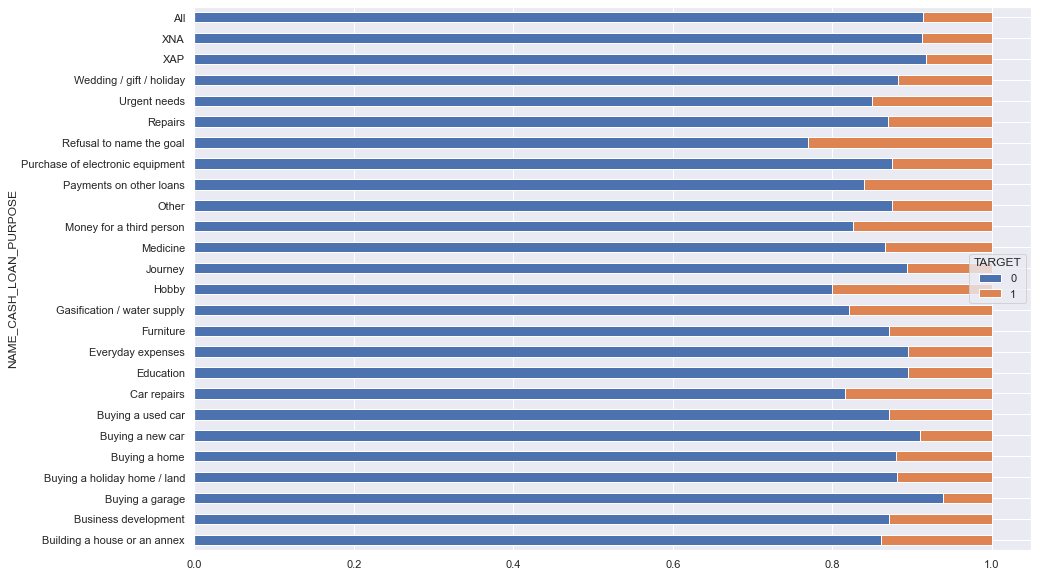

In [143]:
pd.crosstab(df3.NAME_CASH_LOAN_PURPOSE,df3.TARGET,normalize='index',margins=True).plot(kind='barh', stacked=True)


*Defaut rate is high for the people who do not mention their goal(Purpose of the loan)*

In [196]:
df3.groupby(by=['CODE_GENDER','age','TARGET']).count()['SK_ID_CURR']

CODE_GENDER  age  TARGET
F            -70  0           49
             -69  0         3942
                  1          128
             -68  0         8646
                  1          274
                            ... 
M            -22  1          137
XNA          -56  0            3
             -38  0           18
             -30  0           11
             -27  0           23
Name: SK_ID_CURR, Length: 199, dtype: int64

In [233]:
a = df3.groupby(['CODE_GENDER','age','TARGET']).count()[['SK_ID_CURR']]
a_level1 = df3.groupby(['CODE_GENDER','age']).count()[['SK_ID_CURR']]
a['Default_rates'] = a/a_level1*100
a = a.unstack().drop([('SK_ID_CURR', 0),('Default_rates',0)],axis=1).stack()
a['Count'] = a_level1
a

SK_ID_CURR  Default_rates  Count
CODE_GENDER age TARGET                                  
F           -69 1            128.0       3.144963   4070
            -68 1            274.0       3.071749   8920
            -67 1            281.0       3.011144   9332
            -66 1            675.0       4.831437  13971
            -65 1           1060.0       4.643827  22826
...                            ...            ...    ...
M           -26 1           1038.0      12.358614   8399
            -25 1            889.0      12.393699   7173
            -24 1            949.0      13.093267   7248
            -23 1            680.0      14.994487   4535
            -22 1            137.0      13.035205   1051

[96 rows x 3 columns]

In [202]:
df3['ORGANIZATION_TYPE'].nunique()

58

In [205]:
df3.groupby(by=['ORGANIZATION_TYPE','age','TARGET']).count()['SK_ID_CURR']

ORGANIZATION_TYPE  age  TARGET
Advertising        -67  0          7
                   -64  0         46
                   -63  0         30
                   -62  0         14
                        1          3
                                  ..
XNA                -24  0         29
                        1         27
                   -23  0         17
                   -22  0          8
                        1          6
Name: SK_ID_CURR, Length: 4238, dtype: int64

In [ ]:
df3['age'].describe()

<AxesSubplot:>

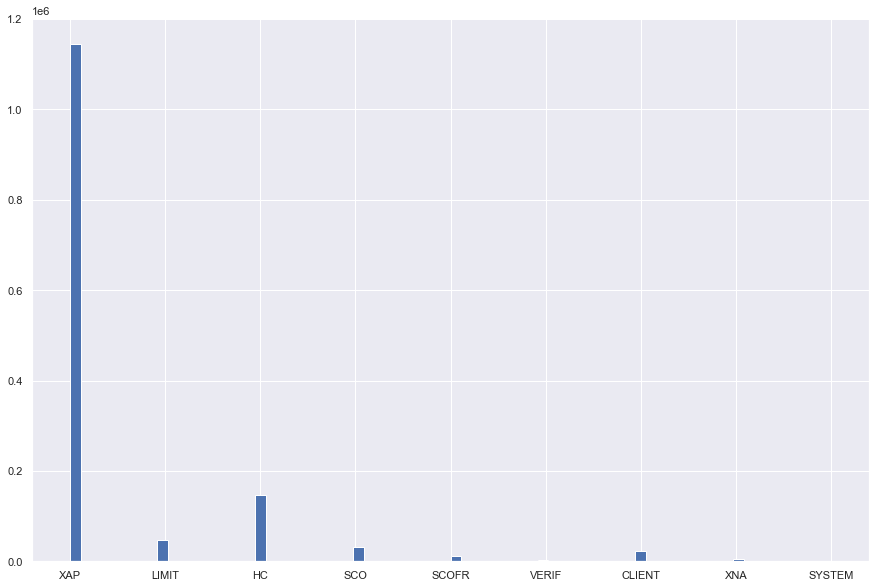

In [208]:
df3['CODE_REJECT_REASON'].hist(bins=70)

<AxesSubplot:ylabel='CODE_REJECT_REASON'>

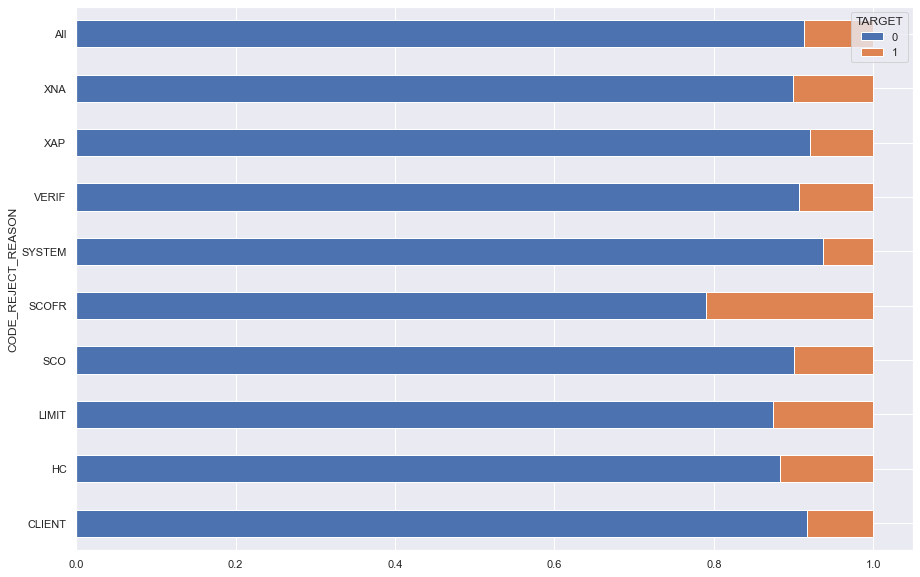

In [209]:
pd.crosstab(df3.CODE_REJECT_REASON,df3.TARGET,normalize='index',margins=True).plot(kind='barh', stacked=True)

In [206]:
df3['PRODUCT_COMBINATION'].unique()

array(['POS other with interest', 'Cash X-Sell: low',
       'POS industry with interest', 'POS household with interest',
       'POS mobile without interest', 'Card Street', 'Card X-Sell',
       'Cash X-Sell: high', 'Cash', 'Cash Street: high',
       'Cash X-Sell: middle', 'POS mobile with interest',
       'POS household without interest', 'POS industry without interest',
       'Cash Street: low', 'Cash Street: middle',
       'POS others without interest', nan], dtype=object)

<AxesSubplot:ylabel='PRODUCT_COMBINATION'>

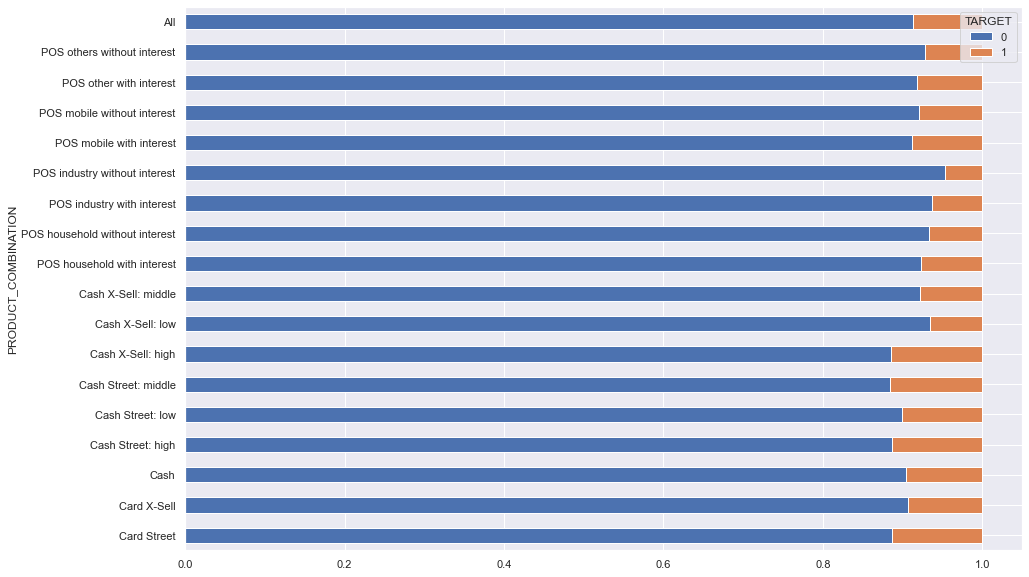

In [207]:
pd.crosstab(df3.PRODUCT_COMBINATION,df3.TARGET,normalize='index',margins=True).plot(kind='barh', stacked=True)


In [ ]:
df3['DAYS_LAST_DUE'].value_counts()

In [ ]:
pd.crosstab(df3['age'],df3['DAYS_LAST_DUE'])

In [237]:
df3.groupby(by=['CNT_FAM_MEMBERS','CNT_CHILDREN','TARGET']).count()['SK_ID_CURR']

CNT_FAM_MEMBERS  CNT_CHILDREN  TARGET
1.0              0             0         277145
                               1          25585
2.0              0             0         644745
                               1          57383
                 1             0          40666
                               1           4850
3.0              1             0         202021
                               1          21103
                 2             0           9002
                               1           1031
4.0              2             0         100024
                               1          10382
                 3             0           1078
                               1            121
5.0              3             0          14491
                               1           1562
                 4             0             96
                               1              2
6.0              4             0           1556
                               1            272
  

In [236]:
a = df1.groupby(['CNT_FAM_MEMBERS','CNT_CHILDREN','TARGET']).count()[['SK_ID_CURR']]
a_level1 = df1.groupby(['CNT_FAM_MEMBERS','CNT_CHILDREN']).count()[['SK_ID_CURR']]
a['Defaulter_rates'] = a/a_level1*100
# a.rename(columns={'SK_ID_CURR':'COUNT'})
a = a.unstack().drop([('SK_ID_CURR', 0),('Defaulter_rates',0)],axis=1).stack()
a['Count'] = a_level1
a

SK_ID_CURR  Defaulter_rates   Count
CNT_FAM_MEMBERS CNT_CHILDREN TARGET                                     
1.0             0            1           5675.0         8.364408   67847
2.0             0            1          10934.0         7.411776  147522
                1            1           1075.0         9.921551   10835
3.0             1            1           4379.0         8.708536   50284
                2            1            229.0         9.883470    2317
4.0             2            1           2104.0         8.611657   24432
                3            1             32.0        12.075472     265
5.0             3            1            326.0         9.443801    3452
                4            1              1.0         3.846154      26
6.0             4            1             54.0        13.399504     403
                5            1              1.0        20.000000       5
7.0             5            1              6.0         7.594937      79
8.0             6            1              6.0        31.578947      19
10.0            9            1              1.0       100.000000       1
11.0            9            1              1.0       100.000000       1
13.0            11           1              1.0       100.000000       1

<AxesSubplot:ylabel='CNT_FAM_MEMBERS,CNT_CHILDREN,TARGET'>

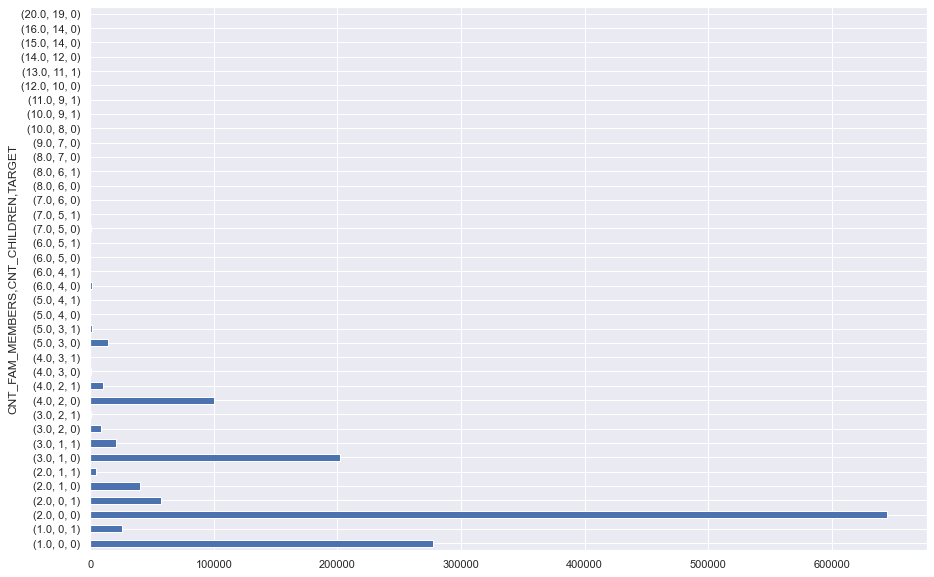

In [193]:
df3.groupby(by=['CNT_FAM_MEMBERS','CNT_CHILDREN','TARGET']).count()['SK_ID_CURR'].plot(kind='barh')

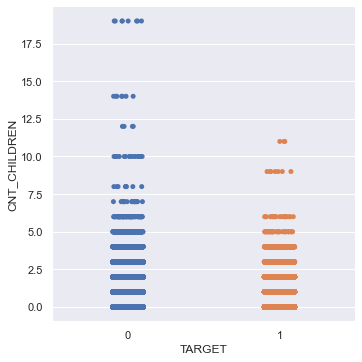

In [156]:
sns.catplot(x="TARGET", y="CNT_CHILDREN", jitter=True, data=df3)

*Default rate is low for clients having more than 12 children*

In [157]:
df3['CNT_CHILDREN'].max()

19

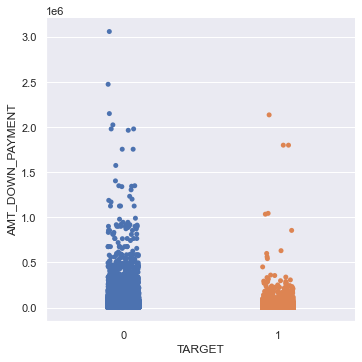

In [39]:
sns.catplot(x="TARGET", y="AMT_DOWN_PAYMENT", jitter=True, data=df3)

In [214]:
df3.groupby(by=['age','TARGET','AMT_DOWN_PAYMENT']).count()['SK_ID_CURR']

age  TARGET  AMT_DOWN_PAYMENT
-70  0       0.000               16
             4050.000             2
             4095.000             1
             4450.500             1
             4500.000             2
                                 ..
-22  1       62878.500            1
             67500.000            1
-21  0       0.000                2
             4492.485             1
             4891.500             1
Name: SK_ID_CURR, Length: 147164, dtype: int64

In [216]:
a = df3.groupby(['age','TARGET','AMT_DOWN_PAYMENT']).count()[['SK_ID_CURR']]
a_level1 = df3.groupby(['age','AMT_DOWN_PAYMENT']).count()[['SK_ID_CURR']]
a['Defaulter_rates'] = a/a_level1*100
# a.rename(columns={'SK_ID_CURR':'COUNT'})
a = a.unstack().drop([('SK_ID_CURR', 0),('Defaulter_rates',0)],axis=1).stack()
a['Count'] = a_level1
a

SK_ID_CURR  Defaulter_rates  Count
age TARGET AMT_DOWN_PAYMENT                                    
-70 0      4050.000                 2.0              NaN   16.0
           4095.000                 1.0              NaN   16.0
           4450.500                 1.0              NaN   16.0
           4500.000                 2.0              NaN   16.0
           6299.775                 2.0              NaN   16.0
...                                 ...              ...    ...
-22 1      53716.050                1.0              NaN    NaN
           62878.500                1.0              NaN    NaN
           67500.000                1.0              NaN    NaN
-21 0      4492.485                 1.0              NaN    2.0
           4891.500                 1.0              NaN    2.0

[147066 rows x 3 columns]

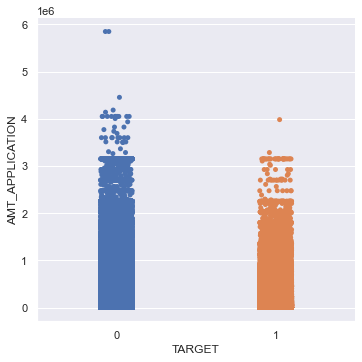

In [47]:
sns.catplot(x="TARGET", y="AMT_APPLICATION", jitter=True, data=df3)

{'whiskers': [<matplotlib.lines.Line2D at 0x15d4ebb6340>,
 'caps': [<matplotlib.lines.Line2D at 0x15d4ebb6a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x15d4eb83fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x15d4eba9100>],
 'fliers': [<matplotlib.lines.Line2D at 0x15d4eba9460>],
 'means': []}

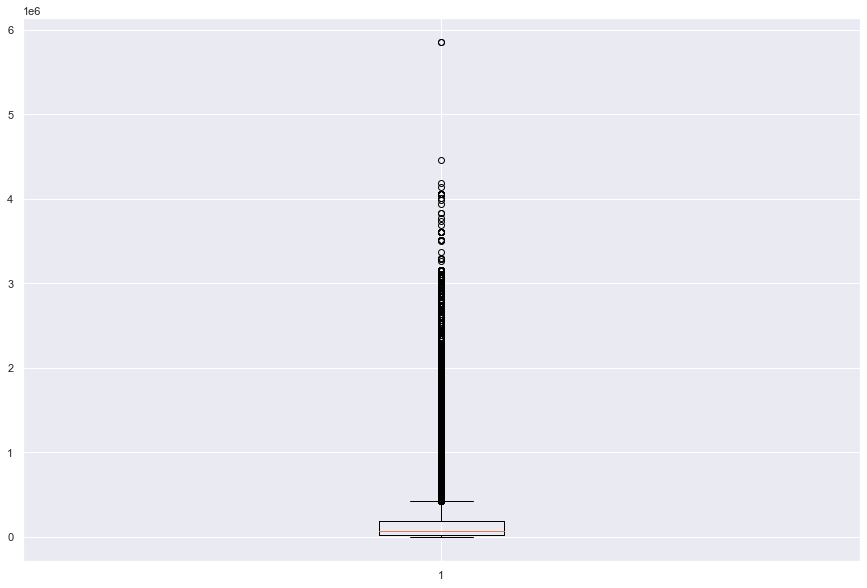

In [50]:
plt.boxplot(df3['AMT_APPLICATION'])

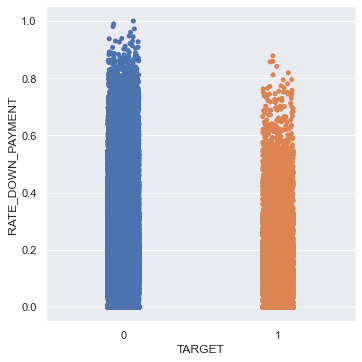

In [53]:
sns.catplot(x="TARGET", y="RATE_DOWN_PAYMENT", jitter=True, data=df3)

In [ ]:
fig, ax = plt.subplots(figsize =(9, 7))
sns.violinplot(ax = ax,  x = df3["RATE_DOWN_PAYMENT"])

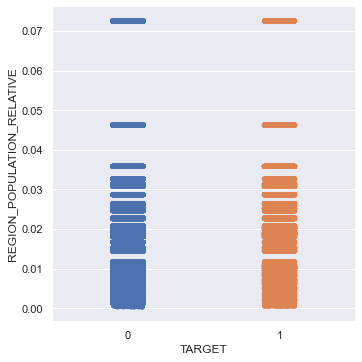

In [93]:
sns.catplot(x="TARGET", y="REGION_POPULATION_RELATIVE", jitter=True, data=df3)

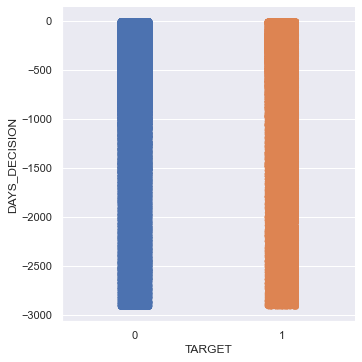

In [116]:
sns.catplot(x="TARGET", y="DAYS_DECISION", jitter=True, data=df3)

<AxesSubplot:ylabel='NAME_FAMILY_STATUS'>

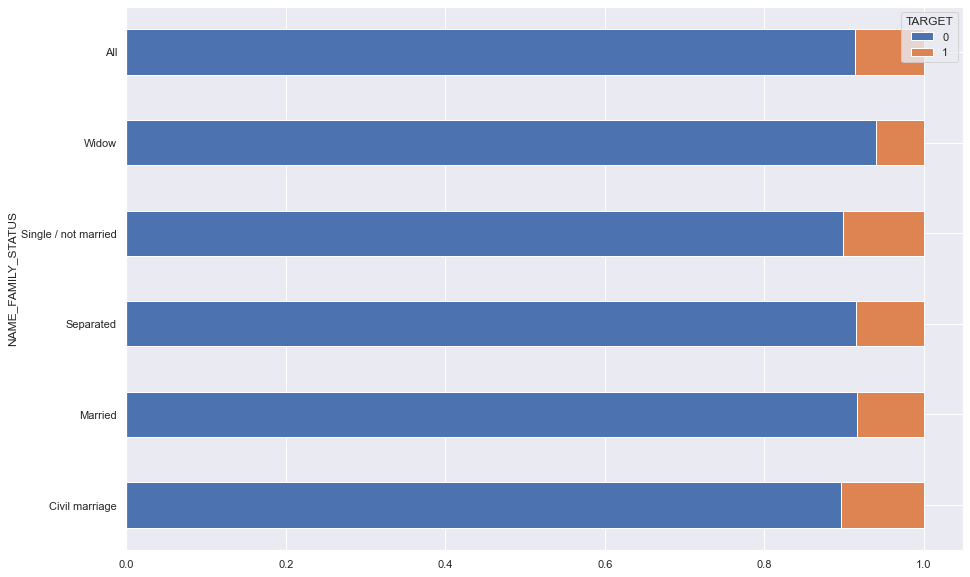

In [96]:
pd.crosstab(df3.NAME_FAMILY_STATUS,df3.TARGET,normalize='index',margins=True).plot(kind='barh', stacked=True)

In [108]:
df3['OWN_CAR_AGE'].value_counts()

7.0     33780
3.0     29718
6.0     28072
8.0     27275
2.0     27234
        ...  
91.0        6
50.0        2
47.0        1
48.0        1
52.0        1
Name: OWN_CAR_AGE, Length: 61, dtype: int64

In [129]:
df3['DAYS_FIRST_DRAWING'].value_counts()

 365243.0    799094
-228.0          115
-224.0          113
-212.0          112
-220.0          111
              ...  
-1842.0           1
-1844.0           1
-1845.0           1
-1846.0           1
-1886.0           1
Name: DAYS_FIRST_DRAWING, Length: 2799, dtype: int64

In [194]:
df3.groupby(by=['age','OWN_CAR_AGE','TARGET']).count()['SK_ID_CURR']

age  OWN_CAR_AGE  TARGET
-69  0.0          0          22
     1.0          0          17
     2.0          0          30
     3.0          0          56
     4.0          0          73
                           ... 
-22  64.0         0         177
                  1          19
     65.0         0          14
                  1           2
-21  65.0         0           4
Name: SK_ID_CURR, Length: 3513, dtype: int64

In [170]:
df3.groupby(by=['age','AMT_APPLICATION','TARGET']).count()['SK_ID_CURR']

age  AMT_APPLICATION  TARGET
-70  0.000            0         11
     21474.000        0          1
     25605.000        0          1
     26685.000        0          1
     27315.000        0          2
                                ..
-22  2070000.000      1          1
-21  44911.485        0          1
     48906.000        0          1
     68805.000        0          1
     141916.500       0          1
Name: SK_ID_CURR, Length: 415102, dtype: int64

In [174]:
a = df3.groupby(['age','AMT_APPLICATION','TARGET']).count()[['SK_ID_CURR']]
a_level1 = df3.groupby(['age','AMT_APPLICATION']).count()[['SK_ID_CURR']]
a['Defaulter_rates'] = a/a_level1*100
# a.rename(columns={'SK_ID_CURR':'COUNT'})
a = a.unstack().drop([('SK_ID_CURR', 0),('Defaulter_rates',0)],axis=1).stack()
a['Count'] = a_level1
a

SK_ID_CURR  Defaulter_rates  Count
age AMT_APPLICATION TARGET                                    
-69 0.0             1             38.0         2.916347   1303
    18625.5         1              1.0       100.000000      1
    20205.0         1              1.0        33.333333      3
    20295.0         1              1.0       100.000000      1
    22860.0         1              1.0        50.000000      2
...                                ...              ...    ...
-22 337500.0        1              1.0        33.333333      3
    387000.0        1              1.0       100.000000      1
    607500.0        1              1.0       100.000000      1
    1800000.0       1              1.0       100.000000      1
    2070000.0       1              1.0       100.000000      1

[46055 rows x 3 columns]

In [183]:
df3.groupby(by=['NAME_FAMILY_STATUS','NAME_INCOME_TYPE','OCCUPATION_TYPE','age','TARGET']).count()['SK_ID_CURR']

NAME_FAMILY_STATUS  NAME_INCOME_TYPE      OCCUPATION_TYPE       age  TARGET
Civil marriage      Commercial associate  Accountants           -64  0         10
                                                                -62  0          7
                                                                -61  0         10
                                                                -59  0         12
                                                                -58  0         20
                                                                               ..
Widow               Working               Waiters/barmen staff  -43  0          6
                                                                -40  0          9
                                                                -39  0         20
                                                                -38  0          8
                                                                -34  0          9
Name: SK_ID_CURR, Leng

In [178]:
df3['NAME_INCOME_TYPE'].unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Maternity leave'], dtype=object)

In [188]:
a = df3.groupby(['NAME_FAMILY_STATUS','NAME_INCOME_TYPE','OCCUPATION_TYPE','age','TARGET']).count()[['SK_ID_CURR']]
a_level1 = df3.groupby(['NAME_FAMILY_STATUS','NAME_INCOME_TYPE','OCCUPATION_TYPE','age']).count()[['SK_ID_CURR']]
a['Defaulter_rates'] = a/a_level1*100
# a.rename(columns={'SK_ID_CURR':'COUNT'})
a = a.unstack().drop([('SK_ID_CURR', 0),('Defaulter_rates',0)],axis=1).stack()
a['Count'] = a_level1
a

SK_ID_CURR  \
NAME_FAMILY_STATUS NAME_INCOME_TYPE     OCCUPATION_TYPE      age TARGET               
Civil marriage     Commercial associate Accountants          -57 1             17.0   
                                                             -47 1              3.0   
                                                             -46 1              1.0   
                                                             -44 1              2.0   
                                                             -43 1              9.0   
...                                                                             ...   
Widow              Working              Security staff       -47 1              7.0   
                                                             -46 1              1.0   
                                                             -45 1             17.0   
                                        Waiters/barmen staff -56 1              2.0   
                                                             -45 1              3.0   

                                                                         Defaulter_rates  \
NAME_FAMILY_STATUS NAME_INCOME_TYPE     OCCUPATION_TYPE      age TARGET                    
Civil marriage     Commercial associate Accountants          -57 1             53.125000   
                                                             -47 1              4.918033   
                                                             -46 1              1.960784   
                                                             -44 1              3.076923   
                                                             -43 1             12.676056   
...                                                                                  ...   
Widow              Working              Security staff       -47 1             17.948718   
                                                             -46 1              2.702703   
                                                             -45 1             60.714286   
                                        Waiters/barmen staff -56 1            100.000000   
                                                             -45 1            100.000000   

                                                                         Count  
NAME_FAMILY_STATUS NAME_INCOME_TYPE     OCCUPATION_TYPE      age TARGET         
Civil marriage     Commercial associate Accountants          -57 1          32  
                                                             -47 1          61  
                                                             -46 1          51  
                                                             -44 1          65  
                                                             -43 1          71  
...                                                                        ...  
Widow              Working              Security staff       -47 1          39  
                                                             -46 1          37  
                                                             -45 1          28  
                                        Waiters/barmen staff -56 1           2  
                                                             -45 1           3  

[3634 rows x 3 columns]

In [224]:
df3.groupby(by=['NAME_HOUSING_TYPE','age','TARGET']).count()['SK_ID_CURR']

NAME_HOUSING_TYPE  age  TARGET
Co-op apartment    -69  0           39
                   -68  0           49
                   -67  0           25
                   -66  0           12
                   -65  0           72
                                  ... 
With parents       -24  1          325
                   -23  0         1891
                        1          309
                   -22  0          645
                        1           81
Name: SK_ID_CURR, Length: 543, dtype: int64

In [230]:
df3.groupby(by=['AMT_INCOME_TOTAL','age','TARGET']).count()['SK_ID_CURR']


AMT_INCOME_TOTAL  age  TARGET
25650.0           -59  1         12
                  -49  0          1
26100.0           -59  0          2
                  -58  0          2
26460.0           -57  0          1
                                 ..
4500000.0         -51  0          7
6750000.0         -53  0          5
13500000.0        -38  0          7
18000090.0        -44  0          3
117000000.0       -35  1          3
Name: SK_ID_CURR, Length: 12138, dtype: int64